In [1]:
import pandas as pd
import numpy as np

from numpy import mean
from numpy import std

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

from matplotlib import pyplot
import seaborn as sns


In [2]:
# Basic Ordinal Encoded Dataset for Non-Linear Models
ordinal = pd.read_csv('../Data/BaseOrdinal.csv')

In [3]:
X = ordinal.drop(['SalePrice'], axis=1).values
y = ordinal.SalePrice.values

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
# list of other models to evaluate

def get_models():
    models = dict()
    models['gradient boost'] = GradientBoostingRegressor()
    models['Xtreme GB'] = XGBRegressor()
    models['CatBoost'] = CatBoostRegressor(verbose=False)
    return models

In [5]:
scoring = {'r2': 'r2',
           'neg_mae': 'neg_mean_absolute_error'
          }

In [6]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, scoring=scoring, 
                                  cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [7]:
models = get_models()

In [8]:
#Create List of Dictionaries to evalute models

dfs = list()

for name, model in models.items():
    
    # evaluate the model
    df = evaluate_model(model, X, y)
    dfs.append(df)

In [9]:
dfs

[    fit_time  score_time   test_r2  test_neg_mae
 0   1.161350    0.003893  0.918704 -14260.797797
 1   1.251343    0.002760  0.835483 -13957.677704
 2   1.223046    0.001663  0.919861 -14060.019107
 3   1.244690    0.002435  0.902871 -13594.939836
 4   1.208242    0.001380  0.925753 -13450.500594
 5   1.188439    0.001363  0.910583 -15200.815979
 6   1.208277    0.001474  0.921980 -12757.214066
 7   1.227155    0.001339  0.898601 -13569.569801
 8   1.092249    0.002667  0.927782 -13154.529173
 9   1.084204    0.003142  0.851347 -15542.987957
 10  1.109346    0.001204  0.937369 -13076.651464
 11  1.074592    0.001584  0.914829 -14168.783033
 12  1.083887    0.001152  0.813151 -13555.696475
 13  1.098856    0.001115  0.922897 -13319.430698
 14  1.079312    0.001138  0.928267 -13491.985435,
      fit_time  score_time   test_r2  test_neg_mae
 0   22.313726    0.035451  0.906994 -15045.726464
 1   20.972948    0.036042  0.844876 -15091.184385
 2   23.175889    0.044081  0.917901 -14514.43

In [10]:
gb_df = dfs[0][['test_r2', 'test_neg_mae']]
gb_df = gb_df.assign(MAE = gb_df['test_neg_mae'].abs())
gb_df = gb_df.rename(columns = {'test_r2':'GB R2', 'MAE':'GB MAE'})
gb_df

,GB R2,test_neg_mae,GB MAE
0,0.918704,-14260.797797,14260.797797
1,0.835483,-13957.677704,13957.677704
2,0.919861,-14060.019107,14060.019107
3,0.902871,-13594.939836,13594.939836
4,0.925753,-13450.500594,13450.500594
5,0.910583,-15200.815979,15200.815979
6,0.921980,-12757.214066,12757.214066
7,0.898601,-13569.569801,13569.569801
8,0.927782,-13154.529173,13154.529173
9,0.851347,-15542.987957,15542.987957


In [11]:
xgb_df = dfs[1][['test_r2', 'test_neg_mae']]
xgb_df = xgb_df.assign(MAE = xgb_df['test_neg_mae'].abs())
xgb_df = xgb_df.rename(columns = {'test_r2':'XGB R2', 'MAE':'XGB MAE'})
xgb_df

,XGB R2,test_neg_mae,XGB MAE
0,0.906994,-15045.726464,15045.726464
1,0.844876,-15091.184385,15091.184385
2,0.917901,-14514.431345,14514.431345
3,0.889401,-15014.851131,15014.851131
4,0.919365,-14513.341373,14513.341373
5,0.886927,-16294.422208,16294.422208
6,0.907978,-13837.085294,13837.085294
7,0.900390,-14452.474344,14452.474344
8,0.919377,-14098.179657,14098.179657
9,0.824601,-16530.938908,16530.938908


In [12]:
cat = dfs[2][['test_r2', 'test_neg_mae']]
cat = cat.assign(MAE = cat['test_neg_mae'].abs())
cat = cat.rename(columns = {'test_r2':'Cat R2', 'MAE':'Cat MAE'})
cat

,Cat R2,test_neg_mae,Cat MAE
0,0.930637,-12458.598681,12458.598681
1,0.903094,-12068.154461,12068.154461
2,0.935673,-12285.637600,12285.637600
3,0.929734,-11867.911520,11867.911520
4,0.950324,-11318.734225,11318.734225
5,0.936665,-12521.387238,12521.387238
6,0.941445,-10996.331917,10996.331917
7,0.923793,-12130.609562,12130.609562
8,0.944311,-11558.860150,11558.860150
9,0.887027,-14002.878030,14002.878030


In [13]:
dfs

[    fit_time  score_time   test_r2  test_neg_mae
 0   1.161350    0.003893  0.918704 -14260.797797
 1   1.251343    0.002760  0.835483 -13957.677704
 2   1.223046    0.001663  0.919861 -14060.019107
 3   1.244690    0.002435  0.902871 -13594.939836
 4   1.208242    0.001380  0.925753 -13450.500594
 5   1.188439    0.001363  0.910583 -15200.815979
 6   1.208277    0.001474  0.921980 -12757.214066
 7   1.227155    0.001339  0.898601 -13569.569801
 8   1.092249    0.002667  0.927782 -13154.529173
 9   1.084204    0.003142  0.851347 -15542.987957
 10  1.109346    0.001204  0.937369 -13076.651464
 11  1.074592    0.001584  0.914829 -14168.783033
 12  1.083887    0.001152  0.813151 -13555.696475
 13  1.098856    0.001115  0.922897 -13319.430698
 14  1.079312    0.001138  0.928267 -13491.985435,
      fit_time  score_time   test_r2  test_neg_mae
 0   22.313726    0.035451  0.906994 -15045.726464
 1   20.972948    0.036042  0.844876 -15091.184385
 2   23.175889    0.044081  0.917901 -14514.43

In [14]:
box = pd.concat([gb_df, xgb_df, cat], axis=1)
box

,GB R2,test_neg_mae,GB MAE,XGB R2,test_neg_mae,XGB MAE,Cat R2,test_neg_mae,Cat MAE
0,0.918704,-14260.797797,14260.797797,0.906994,-15045.726464,15045.726464,0.930637,-12458.598681,12458.598681
1,0.835483,-13957.677704,13957.677704,0.844876,-15091.184385,15091.184385,0.903094,-12068.154461,12068.154461
2,0.919861,-14060.019107,14060.019107,0.917901,-14514.431345,14514.431345,0.935673,-12285.637600,12285.637600
3,0.902871,-13594.939836,13594.939836,0.889401,-15014.851131,15014.851131,0.929734,-11867.911520,11867.911520
4,0.925753,-13450.500594,13450.500594,0.919365,-14513.341373,14513.341373,0.950324,-11318.734225,11318.734225
5,0.910583,-15200.815979,15200.815979,0.886927,-16294.422208,16294.422208,0.936665,-12521.387238,12521.387238
6,0.921980,-12757.214066,12757.214066,0.907978,-13837.085294,13837.085294,0.941445,-10996.331917,10996.331917
7,0.898601,-13569.569801,13569.569801,0.900390,-14452.474344,14452.474344,0.923793,-12130.609562,12130.609562
8,0.927782,-13154.529173,13154.529173,0.919377,-14098.179657,14098.179657,0.944311,-11558.860150,11558.860150
9,0.851347,-15542.987957,15542.987957,0.824601,-16530.938908,16530.938908,0.887027,-14002.878030,14002.878030


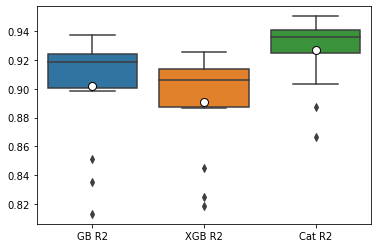

In [15]:
sns.boxplot(data=box[['GB R2', 'XGB R2', 'Cat R2']], showmeans=True,
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"8"});

In [16]:
box.describe()

,GB R2,test_neg_mae,GB MAE,XGB R2,test_neg_mae,XGB MAE,Cat R2,test_neg_mae,Cat MAE
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.901965,-13810.773275,13810.773275,0.891012,-14926.542396,14926.542396,0.926641,-12130.800899,12130.800899
std,0.037549,759.202073,759.202073,0.034387,857.760419,857.760419,0.023523,754.331560,754.331560
min,0.813151,-15542.987957,12757.214066,0.818443,-16530.938908,13837.085294,0.866493,-14002.878030,10996.331917
25%,0.900736,-14114.401070,13384.965646,0.887540,-15179.244521,14426.030300,0.924479,-12417.207216,11579.227135
50%,0.918704,-13569.569801,13569.569801,0.905740,-14598.583735,14598.583735,0.935673,-12130.609562,12130.609562
75%,0.924325,-13384.965646,14114.401070,0.913555,-14426.030300,15179.244521,0.940953,-11579.227135,12417.207216
max,0.937369,-12757.214066,15542.987957,0.925821,-13837.085294,16530.938908,0.950324,-10996.331917,14002.878030


In [17]:
box.to_csv('Gradient_Boost.csv', index=False)